## Stochastic Analysis for Finance with Simulations

Here we solve the exercises from the book https://doi.org/10.1007/978-3-319-25589-7, and discuss the theory behind them.

### Simulation 3.1

We visualize a Cantor set and see why its Lebesgue measure is zero.

The **Cantor set** is a set of real numbers in the interval $[0,1]$ that are constructed by removing the middle third of the interval, then the middle third of each of the two remaining intervals, and so on.

One can prove that the resulting set is defined by an infinite series as follows:
$$
A = \left\{ x \in [0,1]  \mid x = \sum_{n=1}^{\infty} \frac{a_n}{3^n}, \quad a_n \in \{0,2\} \right\}.
$$

The Cantor set is usually pointed out in Measure Theory as an example of an uncountable set with Lebesgue measure zero.

Why does it have measure zero? 
The Cantor set is a subset of the real numbers, in which the Lebeasgue measure corresponds to the length of the interval.
It is also a subset of the interval $[0,1]$, which has length 1.
The Cantor set is constructed by removing the middle third of the interval, which has length $1/3$.
Then, we remove the middle third of the two remaining intervals, which have length of $1/3^2$ each.
This process continues indefinitely, and the total length of the removed intervals is:
$$
\sum_{n=0}^{\infty} \frac{2^n}{3^{n+1}}  = 1.
$$

Thus, the Cantor set has measure zero.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

rng = np.random.default_rng(seed=0)

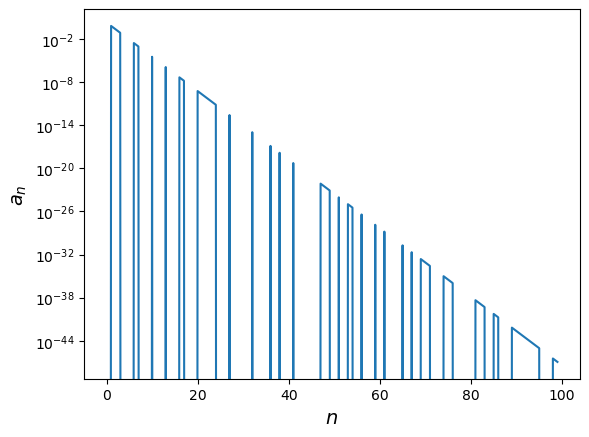

In [21]:
# How many terms of the series to take?
# Let's check the convergence!

rng = np.random.default_rng(seed=1)

num_terms = 100
terms = [2*rng.integers(0,2)/3**n for n in range(num_terms)]

plt.plot(range(num_terms), terms)
plt.xlabel('$n$', fontsize=14)
plt.ylabel('$a_n$', fontsize=14)
plt.yscale('log')
plt.show()

In [36]:
rng = np.random.default_rng(seed=0)

num_terms = 20
N_samples = 100000

samples = []
for _ in tqdm(range(N_samples)):
    samples.append(sum([2*rng.integers(0,2)/3**(1+n) for n in range(num_terms)]))

100%|██████████| 100000/100000 [00:02<00:00, 36111.86it/s]


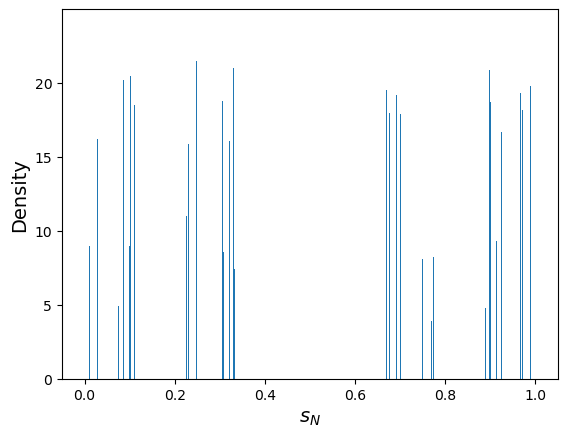

In [44]:
plt.hist(samples, bins=10000, density=True)
plt.xlabel('$s_N$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

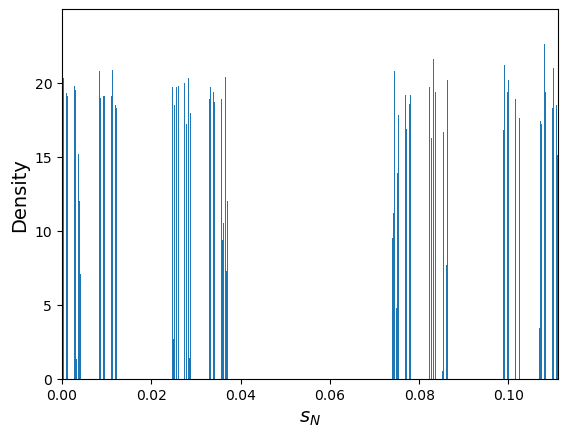

In [45]:
plt.hist(samples, bins=10000, density=True)
plt.xlabel('$s_N$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xlim(0., 0.1111)
plt.show()

The length is smaller than the tolerance after 17 iterations!


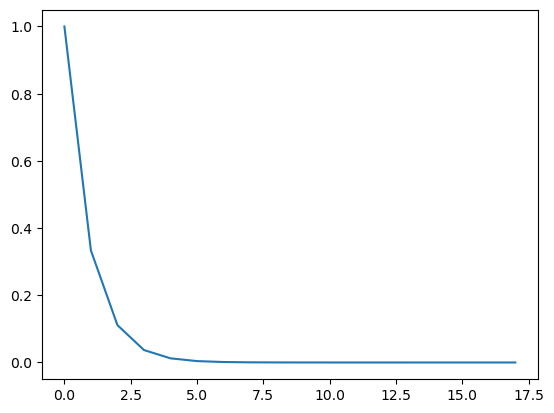

In [11]:
# We construct the Cantor set by iteratively removing the middle third of each interval
# And we see that the total length of the set goes to zero!

def compute_total_length(intervals):
    """ Receive a lists of intervals and return the total length of the set """
    return sum([b-a for a, b in intervals])

tolerance = 1e-8

current_set = [(0., 1.), ]
total_length_history = [compute_total_length(current_set), ]

iterations = 0
while total_length_history[-1] > tolerance:

    new_set = []
    for a, b in current_set:
        new_set.append((a, a + (b-a)/6))
        new_set.append((b - (b-a)/6, b))
    current_set = new_set
    total_length_history.append(compute_total_length(current_set))

    iterations += 1

print(f"The length is smaller than the tolerance after {iterations} iterations!")
plt.plot(range(iterations+1), total_length_history)
plt.show()

### Simulation 4.1

Consider a random variable $X$ normally distributed with mean $\mu = 0$ and variance $\sigma^2 = 1$.
Let $F_X$ be the cumulative distribution function of $X$.
We want to plot the probability density function of the random variable $F_X(X)$ and check that it is a uniform distribution.

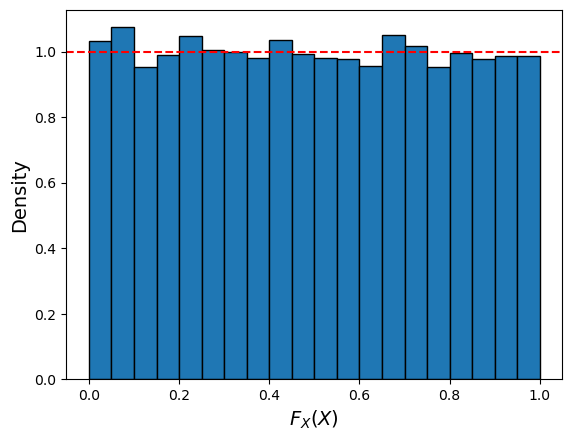

In [53]:
from statistics import NormalDist

distribution = NormalDist(0., 1.)

N_samples = 10**4
N_bins = 20
bin_width = 1/N_bins # the variable F_X(X) takes values in [0, 1]

occurences = np.zeros(N_bins)

samples = distribution.samples(N_samples, seed=42)
for sample in samples:
    F_X = distribution.cdf(sample)
    occurences[int(F_X/bin_width)] += 1

plt.bar(np.linspace(bin_width/2, 1-bin_width/2, N_bins), occurences/N_samples/bin_width, width=bin_width, edgecolor='black')
plt.axhline(1, color='red', linestyle='--')
plt.xlabel('$F_X(X)$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()